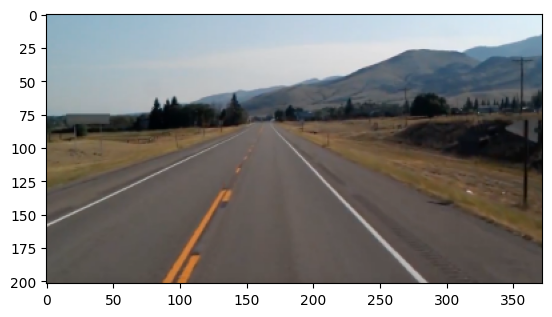

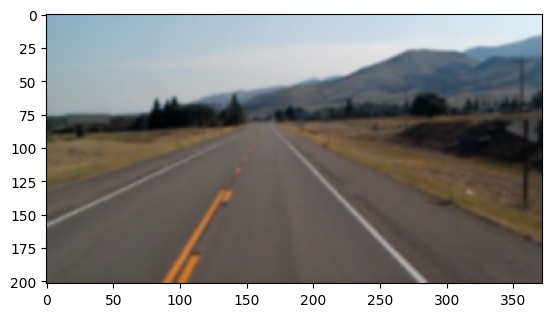

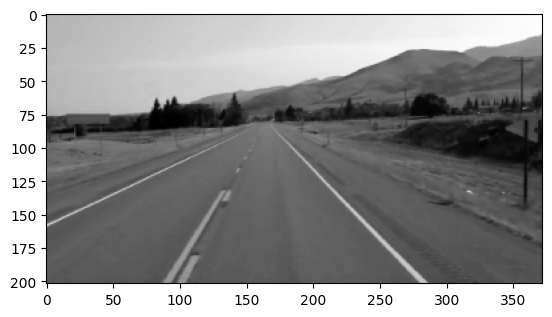

In [53]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("C:\\Users\\Dell\\Desktop\\street.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

blur = cv2.GaussianBlur(img, (5, 5), 0)
plt.imshow(blur, cmap='gray')
plt.show()

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()


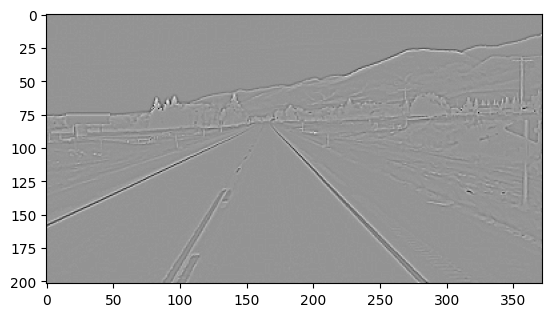

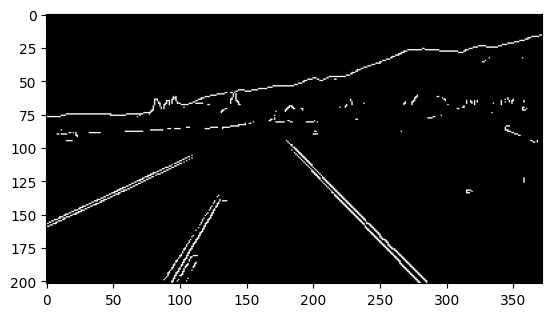

In [54]:
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
plt.imshow(laplacian, cmap='gray')
plt.show()
# thresholds could be changed according to the appearance momken aghyrha di values mabda2eya
canny = cv2.Canny(gray, threshold1=250, threshold2=255)
plt.imshow(canny,  cmap='gray')
plt.show()



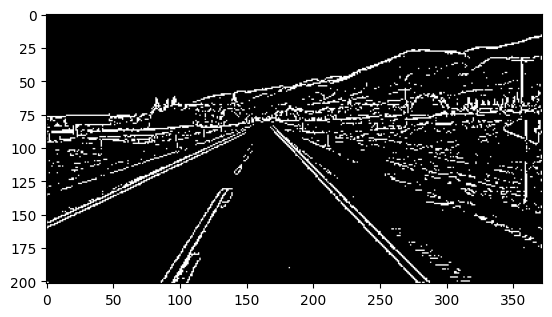

In [55]:
# malhash lazma tagreba fakat 3ashan ashouf el laplacian
white = np.ones(img.shape, dtype=np.uint8) * 255
white[laplacian < 10] = 0
plt.imshow(white)
plt.show()

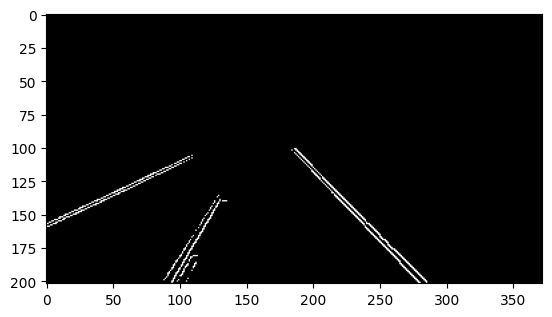

(202, 372)


In [56]:
# gebt el region of interest bel tagroba
h, w = canny.shape
roi = np.zeros((h, w), dtype=np.uint8)
roi[int(h/2):h, 0:w-60] = canny[int(h/2):h, 0:w-60]
plt.imshow(roi, cmap='gray')
plt.show()
print(roi.shape)

423.30603586530634
(423, 180)
130


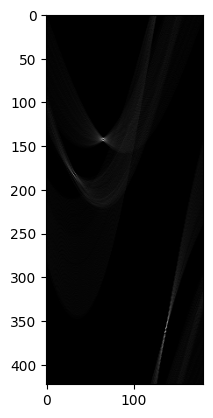

In [57]:
import  math
max_raw=math.sqrt(h*h+w*w)
print(max_raw)

accumulator = np.zeros((int(max_raw), 180), dtype=np.uint8)
print(accumulator.shape)

for y in range(h):
    for x in range(w):
        if roi[y, x] == 255:
            for theta in range(0, 180):
                theta_radian = (theta * np.pi) / 180
                raw = int((x * np.cos(theta_radian)) + (y * np.sin(theta_radian)))
                accumulator[raw, theta] += 1
                
max_value = np.amax(accumulator)
print(max_value)   


plt.imshow(accumulator, cmap='gray')
plt.show()
